In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['figure.figsize']=(12,6)

from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [2]:
train=pd.read_csv('data/house_price_train.csv')
test=pd.read_csv('data/house_price_test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
prices=pd.DataFrame({'price':train.SalePrice,'log(price+1)':np.log1p(train.SalePrice)})
prices.head()

,log(price+1),price
0,12.247699,208500
1,12.109016,181500
2,12.317171,223500
3,11.849405,140000
4,12.429220,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109c38828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x103febb38>]], dtype=object)

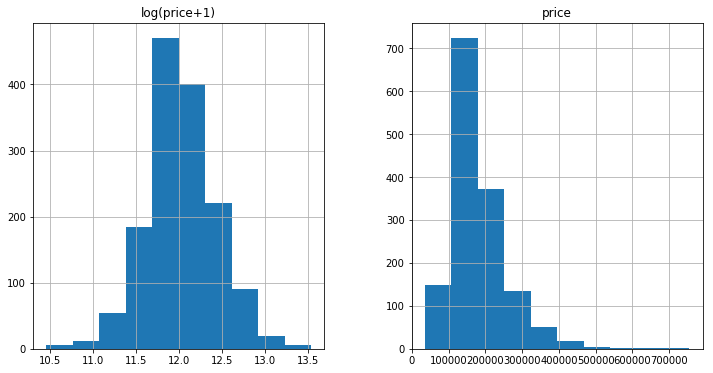

In [5]:
prices.hist()

In [6]:
train.SalePrice=np.log1p(train.SalePrice)

In [7]:
all_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [8]:
tp=all_data.dtypes[all_data.dtypes!='object']
tp.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [9]:
numeric_features=all_data.dtypes[all_data.dtypes!='object'].index

In [10]:
print(skew(train.iloc[:,1]))
skew(train.iloc[:,1].dropna())

1.4062101115313512


1.4062101115313512

In [11]:
train[numeric_features].skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
dtype: float64

In [12]:
skewed_features=train[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features=skewed_features[skewed_features>0.75].index

In [13]:
all_data[skewed_features]=np.log1p(all_data[skewed_features])

In [14]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


In [15]:
all_data=pd.get_dummies(all_data)

In [16]:
tt=pd.DataFrame()
tt['c1']=np.arange(6)
tt['c2']=['a','b','a','c','b','c']
tt['c3']=np.arange(5,11)
tt['c4']=['f','m','f','f','f','m']
pd.get_dummies(tt)

,c1,c3,c2_a,c2_b,c2_c,c4_f,c4_m
0,0,5,1,0,0,1,0
1,1,6,0,1,0,0,1
2,2,7,1,0,0,1,0
3,3,8,0,0,1,1,0
4,4,9,0,1,0,1,0
5,5,10,0,0,1,0,1


In [17]:
all_data=all_data.fillna(all_data.mean())

In [18]:
X_train=all_data[:train.shape[0]]
X_test=all_data[train.shape[0]:]
y=train.SalePrice

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [20]:
def rmse_cv(model):
    return np.sqrt(-cross_val_score(model, X_train, y, cv=5, scoring='neg_mean_squared_error'))

In [21]:
rmse_cv(Ridge(0.05))

array([ 0.12332586,  0.14541962,  0.15403882,  0.11276692,  0.15913067])

In [23]:
rmse_cv(Ridge(0.5)).mean()

0.13346600347350573

In [25]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ridge_cv=[rmse_cv(Ridge(a)).mean() for a in alphas]
ridge_cv

[0.13893637694024724,
 0.13777538277187887,
 0.13501433618086037,
 0.13136184989399574,
 0.12864892446111864,
 0.12782179689257292,
 0.12733734668670763,
 0.12752940439753818,
 0.12895888148450027,
 0.13099437857191418,
 0.13316366423370254]

In [27]:
cv_ridge=pd.Series(ridge_cv, index=alphas)
cv_ridge

0.05     0.138936
0.10     0.137775
0.30     0.135014
1.00     0.131362
3.00     0.128649
5.00     0.127822
10.00    0.127337
15.00    0.127529
30.00    0.128959
50.00    0.130994
75.00    0.133164
dtype: float64

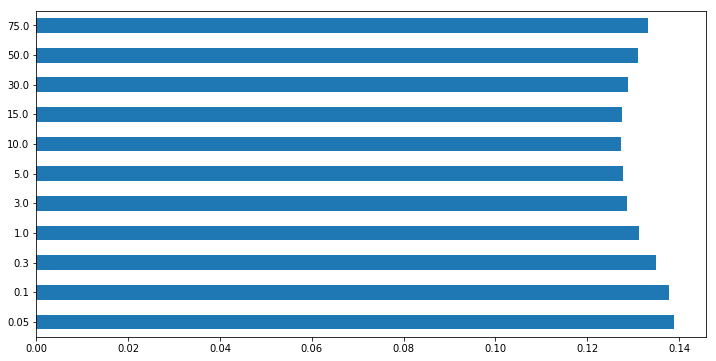

In [30]:
cv_ridge.plot(kind='barh')

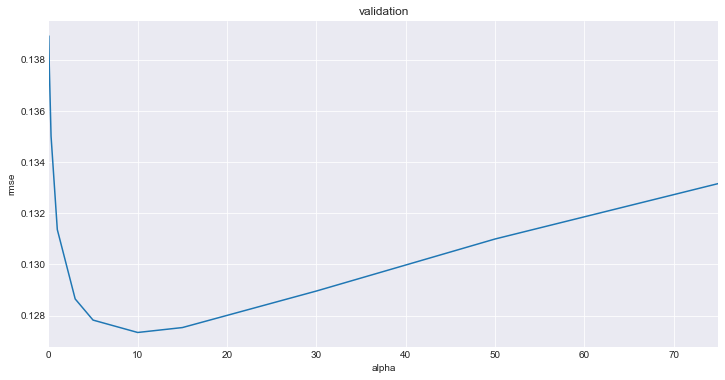

In [35]:
sns.set_style("darkgrid")
cv_ridge.plot.line()
plt.xlabel("alpha")
plt.ylabel('rmse')
plt.title("validation")

In [36]:
cv_ridge.min()

0.12733734668670763

In [38]:
model_lasso=LassoCV(alphas=[1,0.1,0.01,0.005]).fit(X_train, y)
model_lasso

LassoCV(alphas=[1, 0.1, 0.01, 0.005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [47]:
model_lasso.alpha_

0.0050000000000000001